# Hoja de trabajo 2

El objetivo es seguir el tutorial de datacamp que se presenta en el artÃ­culo [Recurrent Neural Network Tutorial (RNN)](https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network?irclickid=38yXsvxDXxyPUmn1yAVdyyL2UkF3bQV52yXfQA0&irgwc=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow). Debe incluir todo el cÃ³digo que se presenta. Todo el cÃ³digo debe funcionar. Adicional se le presentan algunas preguntas que debe responder segÃºn su criterio. 

Al GES debe cargar este mismo archivo con el tutorial corriendo correctamente y su respuesta a las preguntas planteadas.

### Como primer paso se importan las librerias a utilizar

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)



In [1]:
# Cual es el objetivo o la utilidad de los siguientes mÃ³dulos?
#Mean Squared Error (MSE):

#Significado: Error Cuadrático Medio.
#Descripción: Es una métrica utilizada para medir la calidad de un modelo de regresión. Calcula el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.

#Dense:

#Significado: Denso.
#Descripción: En el contexto de las redes neuronales, "Dense" se refiere a una capa completamente conectada, en la cual cada neurona está conectada a todas las neuronas de la capa anterior.


#LSTM:

#Significado: Long Short-Term Memory.
#Descripción: Es un tipo de unidad de red neuronal recurrente (RNN) que es especialmente efectiva para modelar secuencias de datos. Tiene la capacidad de retener y olvidar información a largo plazo, lo que lo hace útil para tareas como el procesamiento de texto, donde es importante recordar contexto de largo alcance.

#Dropout:

#Significado: Abandono.
#Descripción: Es una técnica de regularización utilizada para prevenir el sobreajuste en las redes neuronales. Durante el entrenamiento, se apaga aleatoriamente un porcentaje de neuronas, lo que hace que el modelo sea más robusto y generalice mejor a datos nuevos.

#GRU:

#Significado: Gated Recurrent Unit.
#Descripción: Al igual que LSTM, GRU es otro tipo de unidad de red neuronal recurrente. Tiene una estructura más simple que LSTM, pero aún así es capaz de capturar dependencias a largo plazo en datos secuenciales.

#Bidirectional:

#Significado: Bidireccional.
#Descripción: Es una técnica utilizada en el diseño de ciertos tipos de redes neuronales, especialmente RNN y LSTM. En una red bidireccional, la información se pasa a través de la red en ambas direcciones (de adelante hacia atrás y de atrás hacia adelante), lo que permite que la red tenga información tanto del pasado como del futuro en una secuencia de datos.

In [2]:
# explique en sus propias palabras a que se refiere "data/Mastercard_stock_history.csv" dentro del cÃ³digo anterior.

#se refiere a un conjunto de datos, que es una colección organizada de información. En el contexto de "data/Mastercard_stock_history", parece que se está haciendo referencia a un conjunto de datos específico relacionado con el historial de precios de las acciones de Mastercard.

#Estos conjuntos de datos suelen estar en formatos estructurados, como archivos CSV, bases de datos, o en otros formatos que permiten el almacenamiento y la manipulación de información de manera eficiente.

In [4]:
dataset = pd.read_csv(
    "Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())






                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [5]:
print(dataset.describe())





              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08


In [6]:
dataset.isna().sum()





Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

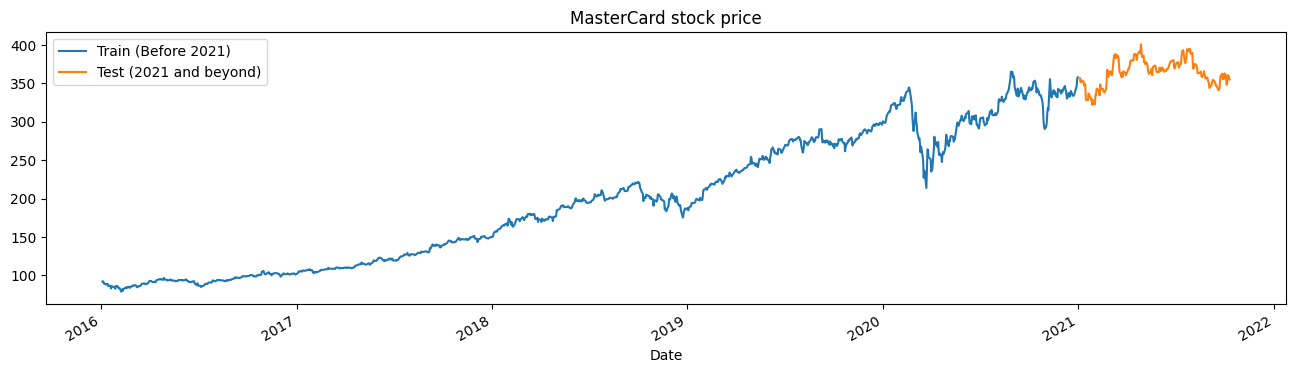

In [7]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)


In [3]:
# Considere la funciÃ³n train_test_plot como un todo (no lÃ­nea por lÃ­nea) y explique lo siguiente
#Recibe:

#Datos de entrenamiento y prueba: La función probablemente recibe un conjunto de datos dividido en conjuntos de entrenamiento y prueba. Estos datos suelen incluir características (variables independientes) y etiquetas (variables dependientes o objetivos) para entrenar y evaluar el modelo.
#Modelo de aprendizaje automático: También es probable que reciba un modelo de aprendizaje automático que se va a entrenar y evaluar. Esto podría ser un objeto de modelo previamente definido.
#Parámetros de entrenamiento y evaluación: Puede recibir parámetros que controlen el proceso de entrenamiento, como el número de épocas, la tasa de aprendizaje, entre otros.

#Hace:

#Entrenamiento del modelo: La función entrenará el modelo de aprendizaje automático utilizando los datos de entrenamiento y los parámetros especificados.
#Evaluación del modelo: Luego, evaluará el modelo entrenado utilizando los datos de prueba para medir su rendimiento. Esto podría implicar calcular métricas de rendimiento como el error cuadrático medio (MSE) o la precisión, dependiendo del tipo de problema (regresión o clasificación).
#Generación de gráficos: La función probablemente generará gráficos o visualizaciones que representen el rendimiento del modelo. Esto podría incluir gráficos de curvas de aprendizaje, gráficos de dispersión, matrices de confusión, entre otros, según el objetivo y el tipo de modelo.

#Devuelve:

#La función puede devolver varios resultados, que pueden incluir:
#Métricas de rendimiento del modelo, como la precisión o el MSE.
#Gráficos que representan visualmente el rendimiento del modelo.
#El modelo entrenado, si se desea conservarlo para su uso posterior.

In [8]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)





In [4]:
# Considere la funciÃ³n train_test_split como un todo (no lÃ­nea por lÃ­nea) y explique lo siguiente
#Recibe:

#Datos: La función recibe el conjunto de datos que se desea dividir. Este conjunto de datos debe incluir tanto las características (X) como las etiquetas (y) si se está trabajando en un problema supervisado.

#Parámetro test_size o train_size (opcional): Este parámetro indica la proporción de datos que se asignarán al conjunto de prueba (o entrenamiento). Si no se proporciona, generalmente se asume que el 20% se utilizará para prueba y el 80% para entrenamiento.

#Parámetro random_state (opcional): Esto permite controlar la semilla utilizada por el generador de números aleatorios que realiza la división. Al proporcionar un número entero, aseguras que el proceso de división sea reproducible.

#Hace:

#División de datos: La función divide los datos en dos conjuntos disjuntos: uno para entrenamiento y otro para prueba. La proporción de división está determinada por el parámetro test_size.

#Aleatorización (si shuffle=True): Si shuffle=True, los datos se barajan aleatoriamente antes de dividirse. Esto es importante para asegurarse de que los conjuntos de entrenamiento y prueba sean representativos del conjunto de datos completo.

#Devuelve:

#La función devuelve cuatro conjuntos de datos (o dos tuplas en el caso de la notación de salida múltiple):

#Conjunto de entrenamiento (X_train, y_train): Contiene las características de entrenamiento y las etiquetas asociadas.

#Conjunto de prueba (X_test, y_test): Contiene las características de prueba y las etiquetas asociadas

In [9]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)





In [10]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)





In [5]:
# Considere la funciÃ³n split_sequence como un todo (no lÃ­nea por lÃ­nea) y explique lo siguiente
#Recibe:

#Datos de secuencia: La función probablemente recibe una secuencia de datos. Esto podría ser una lista, una matriz, o algún otro tipo de estructura de datos que contenga la secuencia de interés.

#Longitud de secuencia (n_steps): Es probable que la función también tome como argumento el número de pasos de tiempo que se utilizarán para predecir el siguiente valor. Esto indica cuántos pasos de tiempo hacia atrás se utilizarán para predecir el siguiente valor en la secuencia.

#Hace:

#División en secuencias: La función probablemente divide la secuencia de datos en subsecuencias más pequeñas. Cada subsecuencia tendrá una longitud igual a n_steps.

#Preparación de entrada y salida: A menudo, en el contexto del aprendizaje supervisado, se prepara la secuencia para que pueda ser utilizada para entrenar un modelo. Para esto, se asume que se está haciendo una predicción de series temporales y se crea un conjunto de datos donde las primeras n_steps observaciones son las características (X) y la siguiente observación es la etiqueta (y).

#Devuelve:

#La función probablemente devolverá los datos de entrenamiento en el formato preparado para el aprendizaje supervisado. Esto podría ser un conjunto de características (X) y un conjunto de etiquetas (y).

#En algunos casos, puede que la función también devuelva información adicional, como los índices de inicio y fin de cada secuencia generada

In [11]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)





In [12]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()
Model: "sequential"



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 63626 (248.54 KB)
Trainable params: 63626 (248.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 3s 31ms/step - loss: 0.0132
Epoch 2/50
38/38 [==============================] - 1s 30ms/step - loss: 0.0025
Epoch 3/50
38/38 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 4/50
38/38 [==============================] - 1s 31ms/step - loss: 0.0019
Epoch 5/50
38/38 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 6/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0015
Epoch 7/50
38/38 [==============================] - 1s 28ms/step - loss: 9.3064e-04
Epoch 8/50
38/38 [==============================] - 1s 25ms/step - loss: 0.0013
Epoch 9/50
38/38 [==============================] - 1s 26ms/step - loss: 9.6918e-04
Epoch 10/50
38/38 [==============================] - 1s 31ms/step - loss: 0.0010
Epoch 11/50
38/38 [==============================] - 1s 28ms/step - loss: 8.0770e-04
Epoch 12/50
38/38 [==============================] - 1s 28ms/step - loss: 8.1050e-04
Epoch 13/50
38/38 [==

In [6]:
# CuÃ¡l es la arquitectura del modelo que se va usar?
# Es un modelo secuencial que se someterá a una serie de entrenamientos y técnicas como Scaling, transformación, procesamiento de predicciones, entre otras

In [14]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)




7/7 [==============================] - 1s 9ms/step


In [15]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()







In [16]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))





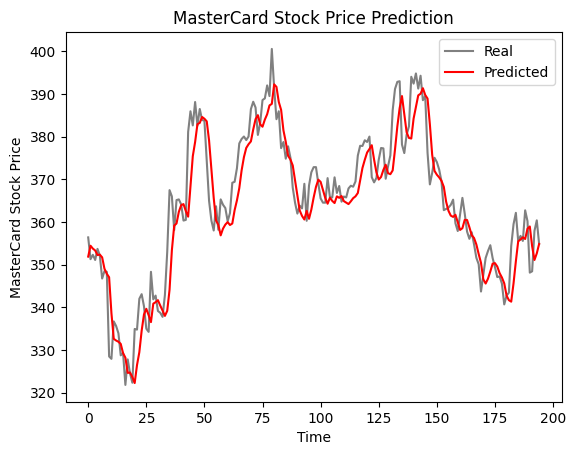

In [17]:
plot_predictions(test_set,predicted_stock_price)

In [19]:
return_rmse(test_set,predicted_stock_price)



The root mean squared error is 6.53.


In [8]:
# Considere la funciÃ³n return_rmse como un todo (no lÃ­nea por lÃ­nea) y explique lo siguiente
#Recibe:

#Predicciones y valores reales: La función probablemente recibe dos conjuntos de datos. Uno es el conjunto de predicciones hechas por un modelo de regresión y el otro es el conjunto de valores reales que se están tratando de predecir. Ambos conjuntos deben tener la misma longitud y estar relacionados uno a uno.
#Hace:

#Calcula el Error Cuadrático: La función calcula el error cuadrático para cada par de predicción y valor real. Esto implica tomar la diferencia entre la predicción y el valor real, elevar al cuadrado y luego sumar todos estos cuadrados.

#Calcula el RMSE: Después de calcular el error cuadrático para cada par de predicción y valor real, la función toma la raíz cuadrada del promedio de estos errores cuadráticos. Esto da como resultado el RMSE.

#Devuelve:

#La función devuelve el valor del RMSE, que es una medida de cuánto se desvían en promedio las predicciones del modelo de los valores reales. Cuanto menor sea el RMSE, mejor será el rendimiento del modelo.

In [20]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()
Model: "sequential_5"




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48126 (187.99 KB)
Trainable params: 48126 (187.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)




Epoch 1/50
38/38 [==============================] - 4s 27ms/step - loss: 0.0157
Epoch 2/50
38/38 [==============================] - 1s 23ms/step - loss: 0.0018
Epoch 3/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0016
Epoch 4/50
38/38 [==============================] - 1s 24ms/step - loss: 0.0014
Epoch 5/50
38/38 [==============================] - 1s 24ms/step - loss: 0.0010
Epoch 6/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 7/50
38/38 [==============================] - 1s 26ms/step - loss: 7.7029e-04
Epoch 8/50
38/38 [==============================] - 1s 29ms/step - loss: 8.9306e-04
Epoch 9/50
38/38 [==============================] - 1s 25ms/step - loss: 7.7807e-04
Epoch 10/50
38/38 [==============================] - 1s 23ms/step - loss: 8.7435e-04
Epoch 11/50
38/38 [==============================] - 1s 25ms/step - loss: 6.5645e-04
Epoch 12/50
38/38 [==============================] - 1s 26ms/step - loss: 7.1413e-04
Epoch 13/50
3

In [84]:
# SegÃºn el grÃ¡fico y el RMSE, considera aceptable el modelo? 

# Si lo considero aceptable los niveles se situan +/- lo rangos mínimos aceptables para un modelo

# Si hoy es la fecha lÃ­mite para el proyecto y este ha sido su mejor modelo, lo pondrÃ­a en producciÃ³n? explique

# En lo personal sometería el modelo a pruebas y comparaciones adicionales, para determinar el modelo más optimo

7/7 [==============================] - 1s 15ms/step


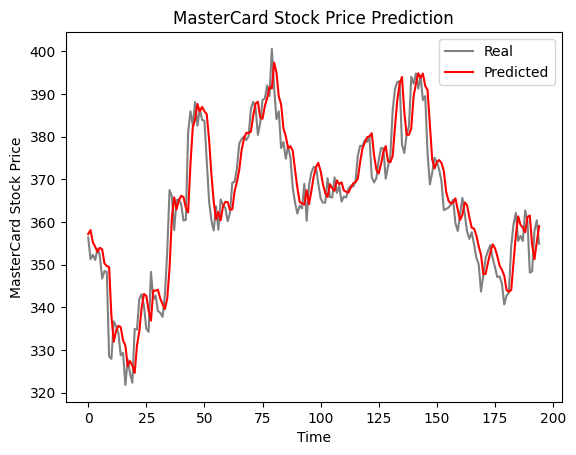

In [22]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)





In [23]:
return_rmse(test_set,GRU_predicted_stock_price)



The root mean squared error is 5.89.
